In [1]:
cd Radial-Transformers/

[Errno 2] No such file or directory: 'Radial-Transformers/'
/home-local/akath.nobkp/Radial-Unet


In [2]:
from PIL import Image
import torch
import torch.nn as nn

/gel/usr/akath/.conda/envs/swin/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from torchvision.transforms import transforms
t2pil = transforms.ToTensor()
pil = transforms.ToPILImage()

In [4]:
import numpy as np

In [5]:
from utils import get_sample_params_from_subdiv, get_sample_locations

ImportError: cannot import name 'get_sample_locations' from 'utils' (/home-local/akath.nobkp/Radial-Unet/utils.py)

In [ ]:
a = torch.tensor([0.0, 1.5, 3.047911227757854, 0.5, 17.517568479641348, 3.047911227757854, 1.0, 33.535136959282696, 3.047911227757854]).reshape(3, 3).transpose(0,1)

In [ ]:
a

In [12]:
sampling_loc = []
D = torch.tensor([100, 10, 10, 1]).reshape(1,4).transpose(1,0).cuda()
# a = torch.tensor([0.0, 1.5/2, 3.047911227757854]).reshape(1, 3).transpose(0,1).cuda()

# a = torch.tensor([1.0, 33.535136959282696, 3.047911227757854]).reshape(1, 3).transpose(0,1).cuda()
a = torch.tensor([ 0.8353, 59.2647,  2.9671]).reshape(1, 3).transpose(0,1).cuda()

azimuth_subdiv = 128
radius_subdiv = 32
subdiv = (radius_subdiv*10, azimuth_subdiv*10)
# subdiv = 3
n_radius = 10
n_azimuth = 10
img_size = (128,128)
radius_buffer, azimuth_buffer = 0, 0
xc, yc, D_s = get_sample_params_from_subdiv(
    subdiv=subdiv,
    img_size=img_size,
    D = a, 
    n_radius=n_radius,
    n_azimuth=n_azimuth,
    radius_buffer=radius_buffer,
    azimuth_buffer=azimuth_buffer, 
    distortion_model = 'spherical')

# sample_locations = get_sample_locations(**params)  ## B, azimuth_cuts*radius_cuts, n_radius*n_azimut

In [13]:
xc.shape

torch.Size([1, 320, 1280])

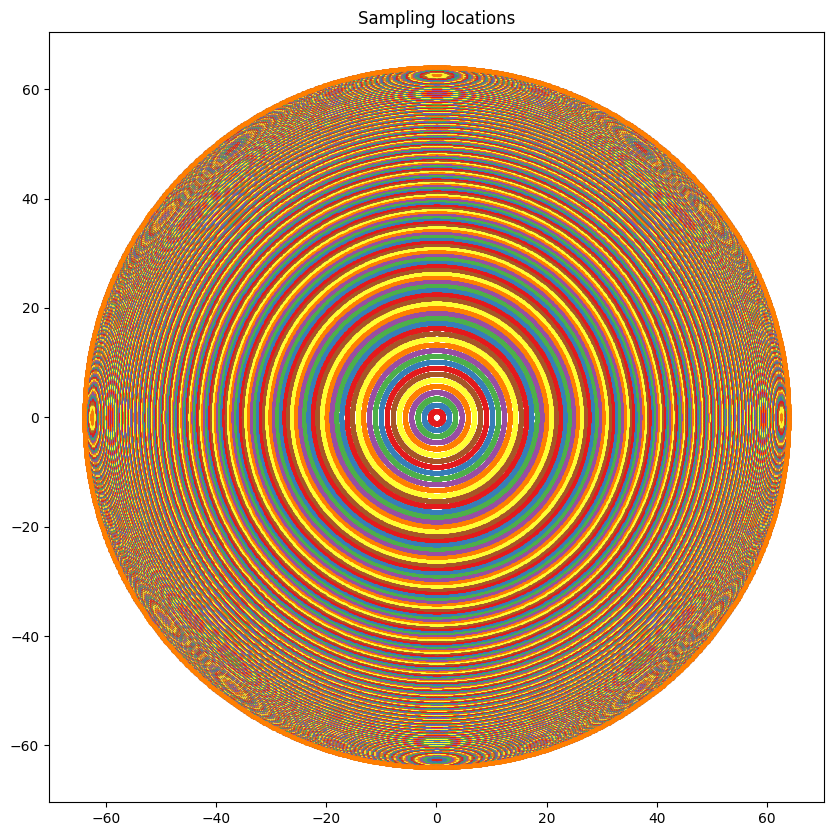

In [14]:
import matplotlib.pyplot as plt
# for i in range(10):


_, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Sampling locations")
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628']
# sampling_loc[0][0].shape[1]
for i in range(xc.shape[1]):
    x = xc[0][i].detach().cpu().numpy()
    y = yc[0][i].detach().cpu().numpy()
    ax.scatter(x, y , color=colors[i%len(colors)], s=6)


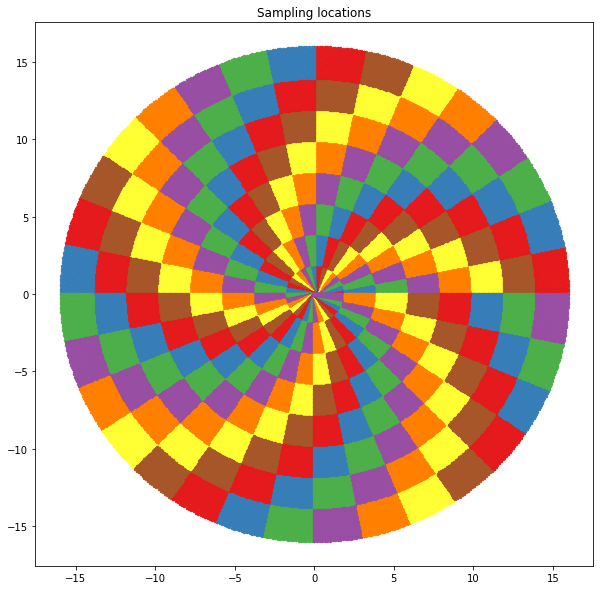

In [15]:
import matplotlib.pyplot as plt
# for i in range(10):


_, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Sampling locations")
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628']
# sampling_loc[0][0].shape[1]
for i in range(sample_locations[0].shape[1]):
    x = sample_locations[0][0][i].detach().cpu().numpy()
    y = sample_locations[1][0][i].detach().cpu().numpy()
    ax.scatter(x, y , color=colors[i%len(colors)], s=6)


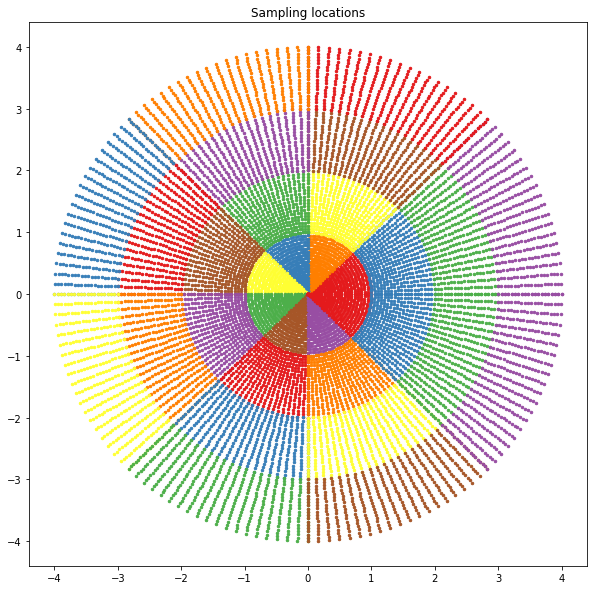

In [50]:
import matplotlib.pyplot as plt
# for i in range(10):
im = Image.open('dog_d.png')
im = im.resize((64, 64), Image.ANTIALIAS)

im = np.array(im)

_, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Sampling locations")
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628']
# sampling_loc[0][0].shape[1]
for i in range(sample_locations[0].shape[1]):
    x = sample_locations[0][0][i].detach().cpu().numpy()
    y = sample_locations[1][0][i].detach().cpu().numpy()
    ax.scatter(x, y , color=colors[i%len(colors)], s=6)


In [ ]:
(x[0][0] - x[0][1])*(x[0][0] - x[0][1]) + (y[0][0] - y[0][1])*(y[0][0] - y[0][1])

In [ ]:
d = 0.5

In [ ]:
import random
eps = np.random.normal(0, d/3)

In [ ]:
eps

In [ ]:
a = torch.tensor([0.0, 7, 0.5, 63.10926839658489, 1.0, 119.21853679316978]).reshape(3, 2).transpose(0,1).cuda()
a[1][0]

In [ ]:
sampling_loc[0].shape

In [ ]:
d = torch.linspace(-1, 1, 8)

In [ ]:
meshx, meshy = torch.meshgrid((d, d))
grid = torch.stack((meshy, meshx), 2)
grid = grid.unsqueeze(0)

In [ ]:
grid.shape

In [ ]:
input

# Image


In [ ]:
im = t2pil(Image.open("../tiny-imagenet-200/train/n01443537/images/n01443537_0.JPEG")).reshape(1, 3, 64, 64)
im_ = t2pil(Image.open("../tiny-imagenet-200/train/n01443537/images/n01443537_1.JPEG")).reshape(1, 3, 64, 64)
inp = torch.cat((im, im_))
inp.shape

# Test

In [ ]:
im = torch.arange(100).reshape(1, 1, 10, 10).float()
im_ = torch.arange(100, 200).reshape(1, 1, 10, 10).float()
inp = torch.cat((im, im_))
inp.shape

In [ ]:
grid

In [ ]:
im

In [ ]:
t_ = nn.functional.grid_sample(im, grid, align_corners = True)

In [ ]:
t_

In [ ]:
D=torch.tensor(np.array([0.5, 0.5, 0.5, 0.5, 1, 1, 1, 1, 2, 2, 2, 2]).reshape(3, 4)).transpose(0, 1)

In [ ]:
a = torch.tensor([0.0, 7, 1.50, 0.5, 63.10926839658489, 1.50, 1.0, 119.21853679316978, 1.50]).reshape(3, 3).transpose(0,1)

In [ ]:
a

In [ ]:
a[:, 1:][0]

In [ ]:

import numpy as np

sz = 5
input_arr = torch.from_numpy(np.arange(sz*sz).reshape(1,1,sz,sz)).float()
input_arr = input_arr//20
indices = torch.from_numpy(np.array([-1,-1, -0.5,-0.5, 0,0, 0.5,0.5, 1,1]).reshape(1, 1, 5, 2)).float()

out = nn.functional.grid_sample(input_arr, indices)
print(input_arr)
print(out)


In [ ]:
48+16

In [ ]:
t = torch.arange(16).reshape(1, 1, 4, 4).float()
t_ = torch.arange(48, 64).reshape(1, 1, 4, 4).float()
inp = torch.cat((t, t_))


In [ ]:
tensor = inp[:, :, x[i*radius_subdiv:radius_subdiv + i*radius_subdiv], y[i*radius_subdiv:radius_subdiv + i*radius_subdiv]].permute(0,2,1,3).contiguous().view(-1, 64*3)

In [ ]:
t = torch.arange(8).reshape(1, 2,2,2)

In [ ]:
t = t.repeat(3, 1, 1, 1)

In [ ]:
t

In [ ]:
out = tensor.contiguous().view(2, 2, -1)
out.shape

In [ ]:
out

In [ ]:
x_[0,0:2,3]  = out

In [ ]:
out.shape

In [ ]:
x_ = torch.rand(2, 2*radius_subdiv, azimuth_subdiv//2, 60)

In [ ]:
for i in range(azimuth_subdiv):
    print(i, i*radius_subdiv)
    tensor = nn.functional.grid_sample(inp, out[i*radius_subdiv:radius_subdiv + i*radius_subdiv].reshape(1, radius_subdiv, 20,2).repeat(2, 1, 1,1), align_corners = False)
#     tensor = inp[:, :, x[i*radius_subdiv:radius_subdiv + i*radius_subdiv], y[i*radius_subdiv:radius_subdiv + i*radius_subdiv]] .permute(0,2,1,3).contiguous().view(-1, 64*3)
    tensor = tensor.permute(0,2,1,3).contiguous().view(-1, 20*3)
    o = tensor.contiguous().view(2, radius_subdiv, -1)
    if i < azimuth_subdiv//2:
        x_[:, 0:2, azimuth_subdiv//2-1-i, :] = o
    else:
        x_[:, 2:4, 0+i-azimuth_subdiv//2, :] = o
        
    
    


In [ ]:
x_.shape

In [ ]:
o = torch.arange(16)
x = torch.rand(2*radius_subdiv, azimuth_subdiv//2)
x.shape, o

In [ ]:
for i in range(azimuth_subdiv):
    if i < azimuth_subdiv//2:
        x[0:2, azimuth_subdiv//2-1-i] = o[i*2:2 + i*2]
    else:
        x[2:4, 0+i-azimuth_subdiv//2] = o[i*2:2 + i*2]
    
    


In [ ]:
x

In [ ]:
ind = torch.tensor(((0, 0, 1, 2), (1,1,2, 3)))
ind1 = torch.tensor(((1, 2, 3, 2), (1,1,2, 2)))

In [ ]:
inp[:, :, ind, ind1].shape

In [ ]:
q = inp[:, :, ind, ind1].permute(0,2, 1, 3 ).contiguous().view(-1, 12)

In [ ]:
q.shape

In [ ]:
q

In [ ]:
inp[:, :, ind, ind1].permute(0,2, 1, 3).flatten(2)

In [ ]:
q.contiguous().view(2, 2, -1)

In [ ]:
t = torch.ones(( 2, 4, 4, 12))

In [ ]:
t[:, :2, 0, :].shape

In [ ]:
t[:, 0, :2, :] =  q.contiguous().view(2, 2, -1)

In [ ]:
t[0][:, :, 0]